
<h1 style="text-align:center; font-family:Times New Roman">CP321 - Sports Car Analysis Project</h1>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">Nishant Tewari & Dharmik Patel</h2>

<h2 style="text-align:center; font-family:Times New Roman; font-size:1.5em">190684430 & 180343800</h2>

<h1 style="text-align:left; font-family:Times New Roman">Introduction</h1>
<hr>

<span style="font-family: Times New Roman;">The dataset used for this project can be retrieved from [here](https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset?resource=download)</span>

<span style="font-family: Times New Roman;">The data contains information on various Sports cars across multiple car manufactures such as 
- Make & Model of the car 
- Year of Production 
- Engine Size (L)
- Horsepower (HP)
- Torque (lb-ft)
- 0 - 60 MPH time(seconds)
- Price (USD)
</span> 

<span style="font-family: Times New Roman;">The dataset has 38 unique car manufactures ranging from brands we commonly see on the roads all the way to more exotic rides that are not common at all.</span>
</br>
<span style="font-family: Times New Roman;">The lowest price car on the dataset is the 2021 Chevrolet Camaro priced at $25,000 USD</span>
</br>
<span style="font-family: Times New Roman;">The highest price car on the dataset is the 2022 Bugatti Chiron Super Sport 300+ priced at $5.2 million USD</span>



<h1 style="text-align:left; font-family:Times New Roman">Motivation</h1>
<hr>

<span style="font-family: Times New Roman;">As kids, we all had dreams and aspirations, and for many of us, owning a sports car was one of them. The mere sight of a sleek, powerful vehicle would leave us in awe and wonder, imagining ourselves behind the wheel. After the hard work you devoted in the past couple of years, it is finally time to buy you very own sports car. However with many possible makes and models to choose from, your left to wonder which one is the perfect car for you?</span>


<h1 style="text-align:left; font-family:Times New Roman">Budget</h1>
<hr>
<span style="font-family: Times New Roman;">After years of hard work and determination, Silvia finally decided it's her time to purchase a sports car for herself. The Autohaven dealership offers variety of sports cars ranging from $25k - $5.2 million dollars. Silvia had a budget in mind and wanted to only see vehicles under $500,000</span>
***

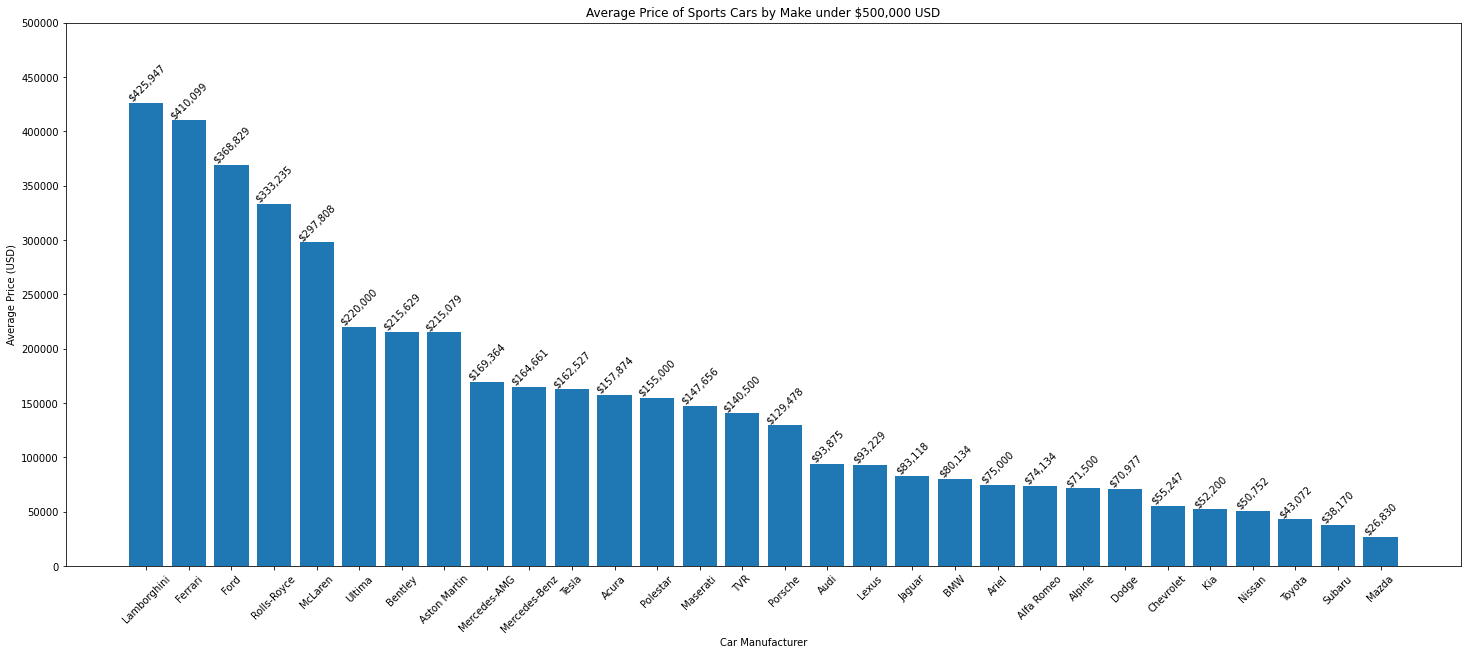

In [26]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sport_car_price.csv')

# Filter the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# Calculating the average price of the cars made by each car manufacturer
avg_price = df.groupby('Car Make')['Price (in USD)'].mean().reset_index()

# Set the overall size of the graph 
plt.figure(figsize=(25, 10))

# Filtering the average prices to show car brands that average below $500,000 USD 
avg_price = avg_price[avg_price['Price (in USD)'] <= 500000]

# Sort the average price of sports car under $500,000 in descending order
sort_avg_price = avg_price.sort_values(by='Price (in USD)', ascending=False)

# Plot a bar plot of the average price for each car manufacturer
plt.bar(sort_avg_price['Car Make'], sort_avg_price['Price (in USD)'])

# Set the plot title and axis labels
plt.title('Average Price of Sports Cars by Make under $500,000 USD')
plt.xlabel('Car Manufacturer')
plt.ylabel('Average Price (USD)')

# Rotate the labels on the x-axis to make it easier to read 
plt.xticks(rotation=45)

# Annotate each bar with the exact average price calculated for each manufacturer
for i, v in enumerate(sort_avg_price['Price (in USD)']):
    plt.text(i, v, f'${round(v, 0):,.0f}', ha='center', va='bottom', rotation=45)

# Set the y-axis labels with an increment of $50,000 between (0 - $500k)
plt.ylim(0, 500000)
plt.yticks(np.arange(0, 500001, 50000))

# Show the graph 
plt.show()

<span style="font-family: Times New Roman;">The following bar graph displays the manufacturers that have an average price below $500,000 among all of their unique models. The bar plots are in descending order which makes it easier for the user to visualize the average pricing. Since the user requested to see cars below $500,000, this filters out the manufacturers that are priced quite high such as Pagani, Bugatti & Rimac. </span>

<h1 style="text-align:left; font-family:Times New Roman">Horsepower vs Price</h1>
<hr>

<span style="font-family: Times New Roman;">Silvia sparked curiousity and wanted to see the relationship between the horsepower of the vehicles and what they are valued at in USD. Autohaven dealership provided Silvia with a scatter plot to display the relationship</span>


C:\Users\nisht\AppData\Local\Temp\ipykernel_19040\2056661674.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


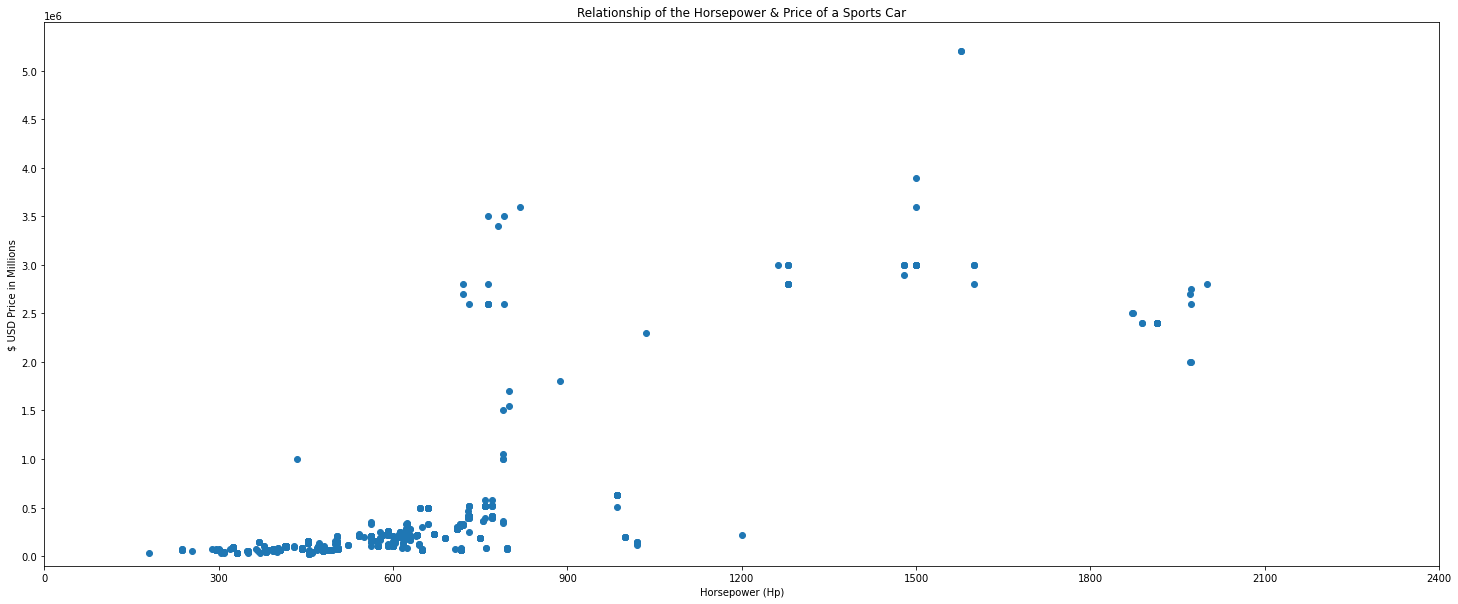

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/sport_car_price.csv')

# Filter the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# Filter the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# Drop the values above at 10000 -> these numbers are unrealistic 
df = df.drop(df[df['Horsepower'] == 10000].index)

# Set the overall size of the graph 
plt.figure(figsize=(25, 10))

# Plot the horsepower values accordinly to their prices 
plt.scatter(df['Horsepower'], df['Price (in USD)'])

# Set the plot, title and axis labels of the graph 
plt.title('Relationship of the Horsepower & Price of a Sports Car')
plt.xlabel('Horsepower (Hp)')
plt.ylabel('$ USD Price in Millions')

# Set the x-axis labels with an increment of 300 horsepower (0 - 2500 hp)
plt.xticks(np.arange(0, 2501, 300))

# Set the y-axis labels with an increment of $500,000 between (0 - $5.5m)
plt.ylim(-100000, 5500000)
plt.yticks(np.arange(0, 5000001, 500000))

# Show the graph 
plt.show()

<span style="font-family: Times New Roman;">The scatter plot above displays the relationship between the sports cars horsepower and how much it would cost. This is a great way for Silvia to visualize to understand that the more horsepower there is, the more expensive the car will be. We can see there the slope of the points gradually increase to the right which means that this is a positive correlation.  </span>

<h1 style="text-align:left; font-family:Times New Roman">Horsepower VS Torque vs Price ($ USD) </h1>
<hr>

<span style="font-family: Times New Roman;">Silvia wants to the relationship between three variables; horsepower, torque and price. Autohaven dealership provided a scatter plot of the relationship of horsepower and torque along with color coded data points related to the price</span>

C:\Users\nisht\AppData\Local\Temp\ipykernel_19040\4141235809.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


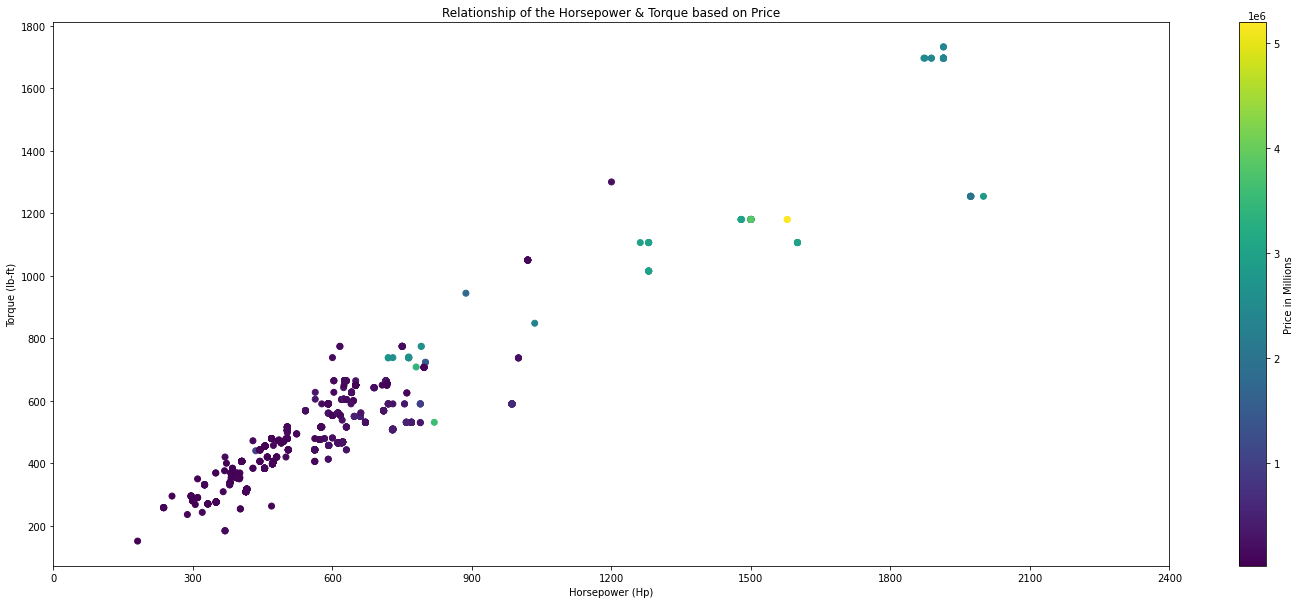

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/sport_car_price.csv')

# Clean any non-numeric values for the Torque column 
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')

# Filter the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# Filter the price column to replace any additonal characters and change to float  
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# Drop the values above at 10000 -> these numbers are unrealistic 
df = df.drop(df[df['Horsepower'] == 10000].index)

# Set the overall size of the graph 
plt.figure(figsize=(25, 10))

# Plot the horsepower values accordinly to their torque relationship and color code it by the price of the sports car 
plt.scatter(df['Horsepower'], df['Torque (lb-ft)'], c= df['Price (in USD)'])

# Set the plot title and axis labels of the graph 
plt.title('Relationship of the Horsepower & Torque based on Price')
plt.xlabel('Horsepower (Hp)')
plt.ylabel('Torque (lb-ft)')

# Set the x-axis labels with an increment of 300 horsepower (0 - 2500 hp)
plt.xticks(np.arange(0, 2501, 300))

# Color gradient legend to show the distrubution of the scatter plots by Price (USD)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Price in Millions')

# Show the graph 
plt.show()

<span style="font-family: Times New Roman;">The scatter plot above displays the relationship between the sports cars horsepower and torque along with it being color coded based on its price. Silvia is able to locate certain points to see how much horsepower it has in comparsion to torqure. Along with that, the points are color coded and a legend is provided to show the representation of the price of the car</span>

<span style="font-family: Times New Roman;">For example, we can take a look at the yellow scatter point. From that point alone, we can see that it has over 1500 horsepower and just below 1200 lb-ft torque and marked as yellow. Yellow means that this car is valued over 5 million dollars. We know this would be the Bugatti Chiron Super Sport 300+ as it was mentioned in the introduction. </span>

<h1 style="text-align:left; font-family:Times New Roman">Torque vs 0-60 MPH time in relationship with Horsepower</h1>
<hr>
<span style="font-family: Times New Roman;">Silvia wanted to see the relationship of three variables again but this time comparing the following; Torque, 0-60 MPH time & Horsepower. Autohaven decided to provide Silvia with a bubble chart this time.</span>

C:\Users\nisht\AppData\Local\Temp\ipykernel_19040\1198787924.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)


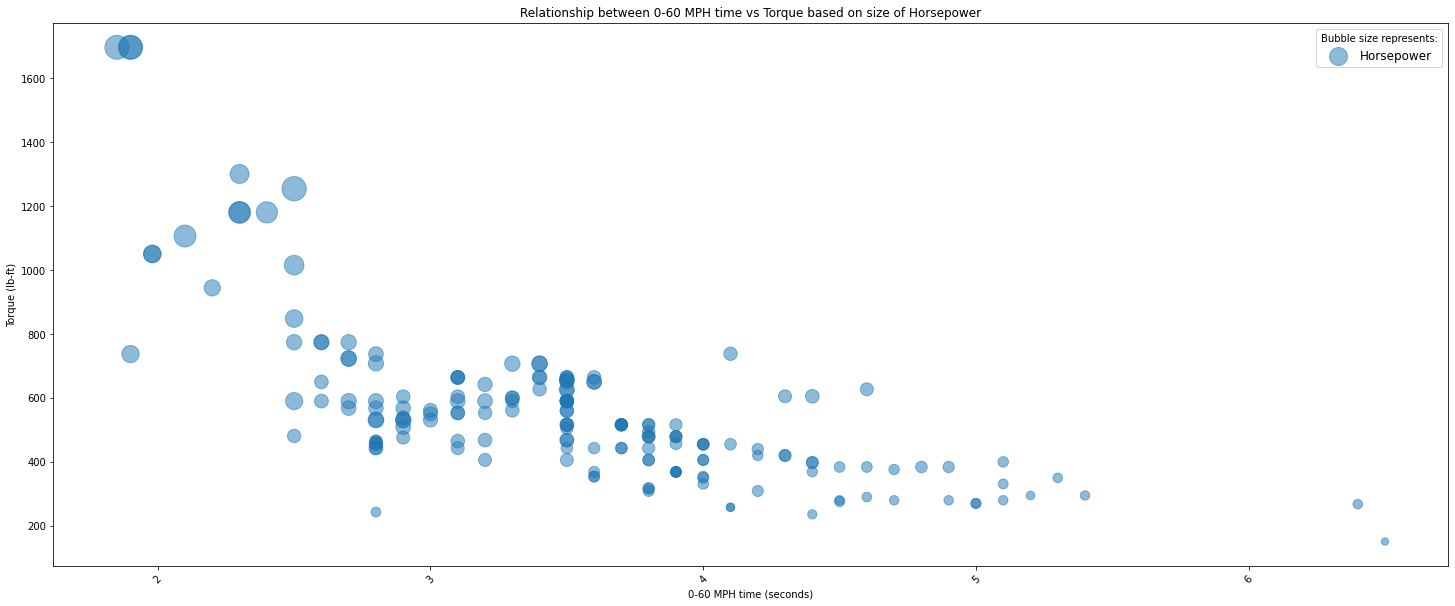

In [31]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/sport_car_price.csv')

# clean any non-numeric values for the Torque column 
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')

# Filter the horsepower column to replace any additonal characters and change to float  
df['Horsepower'] = df['Horsepower'].str.replace(',', '').str.replace('+', '').astype(float)

# Clean any non-numeric data values for the 0-60 MPH time column
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

# Drop any duplicate values to clean the bubble chart
df = df.drop_duplicates(subset=['Car Make', 'Car Model'])

# Set the data columns to create bubble chart relationship
y = df['Torque (lb-ft)']
x = df['0-60 MPH Time (seconds)']
bubble =  df['Horsepower']

# Set the overall size of the graph 
plt.figure(figsize=(25, 10))

# Create bubble chart
plt.scatter(x, y, s= bubble*0.3, alpha=0.5, label= 'Horsepower')

# Set the plot title and axis labels
plt.title('Relationship between 0-60 MPH time vs Torque based on size of Horsepower')
plt.xlabel('0-60 MPH time (seconds)')
plt.ylabel('Torque (lb-ft)')

# Rotate the labels on the x-axis to make it easier to read 
plt.xticks(rotation=45)

# Legend to understand what the bubble size represents 
plt.legend(title='Bubble size represents:', fontsize=12)

# Show the graph 
plt.show()

<span style="font-family: Times New Roman;">Note: Cars with a small 0-60 MPH time means that those are cars have faster acceleration than others. Since the graph may look like it has negative correlation, that does not mean its a bad thing. </span>

<span style="font-family: Times New Roman;">The bubble plot above displays the relationship between the sports cars 0-60 MPH time and torque along with the bubble size representing the horsepower of the car. Silvia can visualize and understand their relationship, she can tell that the more lb-ft torque there is, the smaller the 0-60 MPH time a car will achieve. Cars with a small 0-60 MPH time means that those are cars have faster acceleration than others. </span>

<h1 style="text-align:left; font-family:Times New Roman">Conclusion</h1>
<hr>

<span style="font-family: Times New Roman;">Autohaven dealership has provided Silvia with plenty of visualizations to help her see the relationships between the Sport's Cars attributes. There are plenty of other relationships that can be shown using various graphs. Autohaven has provided their best 4 graphs based on Silvia's preferences to help her narrow down on her car shopping journey. </span>